<a href="https://colab.research.google.com/github/mkg6573/Linear-Regression-from-scratch/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim**

To implement Polynomial Regression from scratch using gradient descent in order to model the non-linear relationship between processor speed and price.

Independent Variable: processor_speed

Dependent Variable: price

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv("/content/after_EDA_dataset.csv")
df.head()


,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


 **Select Feature and Target**

In [12]:
x = df['proccessor_speed'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

m = len(x)  # number of data points


**Create Polynomial Features (Degree = 2)**

In [13]:
x_squared = x ** 2


**Construct Design Matrix**
This represents:

y=θ0 + θ1x + θ2x^2


In [14]:
X = np.hstack((
    np.ones((m, 1)),   # Bias term
    x,
    x_squared
))


**Initialize Parameters**

In [15]:
theta = np.zeros((3, 1))


In [17]:
print(X.shape)
print(theta.shape)
print(y.shape)


(901, 3)
(3, 1)
(901, 1)


Gradient Descent Implementation

In [16]:
epochs = 8000
learning_rate = 0.01
costs = []

for i in range(epochs):
    y_pred = X @ theta
    error = y_pred - y

    cost = (1/(2*m)) * np.sum(error ** 2)
    costs.append(cost)

    gradient = (1/m) * (X.T @ error)
    theta = theta - learning_rate * gradient

theta


array([[-8615.57459362],
       [-5090.94545543],
       [ 7264.48894845]])

Cost vs Epoch Plot

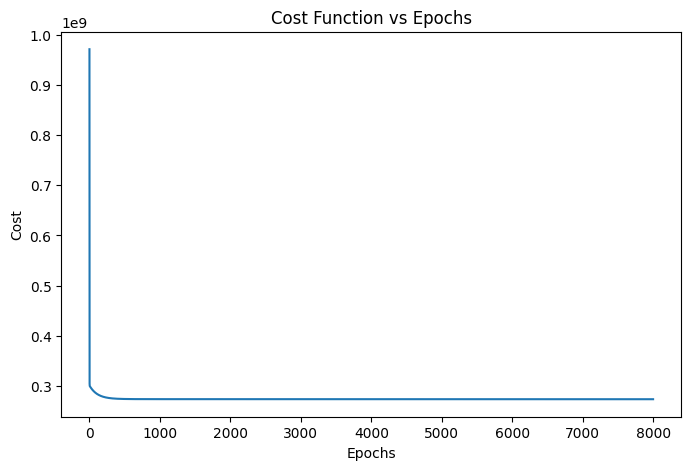

In [18]:
plt.figure(figsize=(8,5))
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Function vs Epochs")
plt.show()


Polynomial Regression Curve

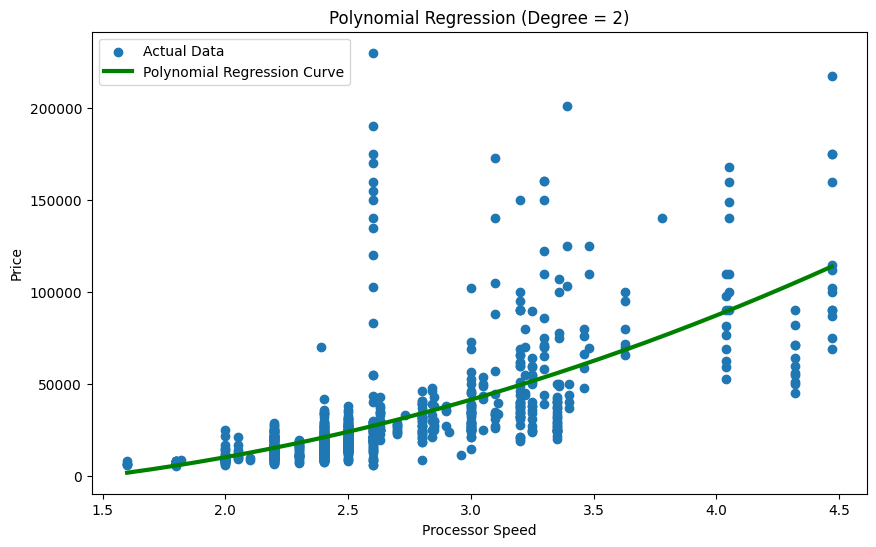

In [19]:
x_line = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)
x_line_sq = x_line ** 2

X_line = np.hstack((
    np.ones((len(x_line), 1)),
    x_line,
    x_line_sq
))

y_line = X_line @ theta

plt.figure(figsize=(10,6))
plt.scatter(x, y, label="Actual Data")
plt.plot(x_line, y_line, color='green', linewidth=3, label="Polynomial Regression Curve")
plt.xlabel("Processor Speed")
plt.ylabel("Price")
plt.title("Polynomial Regression (Degree = 2)")
plt.legend()
plt.show()


Evaluation Metrics (Manual)

In [20]:
y_final_pred = X @ theta

mse = (1/m) * np.sum((y - y_final_pred) ** 2)
rmse = np.sqrt(mse)

ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_final_pred) ** 2)
r2_score = 1 - (ss_residual / ss_total)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2_score)


MSE: 547017769.7948874
RMSE: 23388.411014750178
R² Score: 0.4365415686045697


**Observations**

Polynomial Regression provides a better fit than linear regression for non-linear data.

The cost function decreases steadily, indicating proper convergence.

The regression curve captures curvature between processor speed and price.

**Conclusion**

Polynomial Regression was successfully implemented from scratch using gradient descent. By introducing higher-order terms of processor speed, the model captures non-linear relationships and improves prediction accuracy.